In [10]:
import pandas as pd
import numpy as np
import scanpy as sc
import pathlib

In [11]:
output_dir = '../results_Jun2_suppl/'
pathlib.Path(output_dir).mkdir(exist_ok=True)

In [12]:
granger_df_all_T = pd.read_csv('../results_final_Jan15/granger_draft_A_signed_score.csv', index_col=0)
granger_df_all_T_pvals = pd.read_csv('../results_final_Jan15/granger_draft_A_p.csv', index_col=0)
granger_df_all_T_pvals.index = granger_df_all_T_pvals.index.str.replace('_x', '')
cluster_df = pd.read_csv('../results_Jun2_suppl/cluster_df_extreme_A_draft.csv', index_col=0)
df_reordered = pd.read_csv('../results_Jun2_suppl/granger_draft_heatmap_df_reordered.csv', index_col=0)
adata = sc.read_h5ad('../data/rna_figure_ready.h5ad')

tf_reordered_cluster = pd.DataFrame(index=df_reordered.index)
tf_reordered_cluster['cluster'] = tf_reordered_cluster.index.map(cluster_df['cluster'])
gene_reordered_cluster = pd.DataFrame(index=df_reordered.columns)
gene_reordered_cluster['cluster'] = gene_reordered_cluster.index.map(cluster_df['cluster'])
df_reordered_filtered = df_reordered.copy()

# Create boolean mask for TF clusters > gene clusters using broadcasting
tf_clusters = tf_reordered_cluster['cluster'].values[:, np.newaxis]
gene_clusters = gene_reordered_cluster['cluster'].values
mask = tf_clusters > gene_clusters

# Apply mask to set values to 0 
df_reordered_filtered.values[mask] = 0


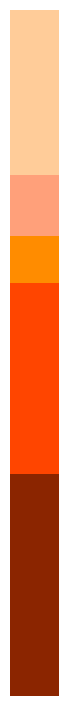

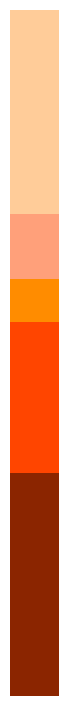

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors as mcolors

cluster_df_sub = gene_reordered_cluster

# Create a more distinctive color palette for the clusters using darker oranges
custom_oranges = [
    "#FFCC99",  # Light Peach
    "#FFA07A",  # Light Salmon
    "#FF8C00",  # Dark Orange
    "#FF4500",  # Orange Red
    "#8B2500"   # Deep Burnt Orange
]
# Get unique clusters
unique_clusters = cluster_df_sub['cluster'].unique()
cluster_colors = custom_oranges[:len(unique_clusters)]

# Create a colormap from the cluster colors
cluster_cmap = mcolors.ListedColormap(cluster_colors)

# Create just the strip plot
fig_strip = plt.figure(figsize=(0.5, 7))
sns.heatmap(pd.DataFrame(cluster_df_sub['cluster']), cmap=cluster_cmap, 
            cbar=False, yticklabels=False, xticklabels=False)
plt.tight_layout(pad=0.1)
plt.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01)
plt.savefig(f'{output_dir}/gene_strip.pdf', bbox_inches='tight', pad_inches=0.05, dpi=300)




cluster_df_sub = tf_reordered_cluster

# Create a more distinctive color palette for the clusters using darker oranges
custom_oranges = [
    "#FFCC99",  # Light Peach
    "#FFA07A",  # Light Salmon
    "#FF8C00",  # Dark Orange
    "#FF4500",  # Orange Red
    "#8B2500"   # Deep Burnt Orange
]
# Get unique clusters
unique_clusters = cluster_df_sub['cluster'].unique()
cluster_colors = custom_oranges[:len(unique_clusters)]

# Create a colormap from the cluster colors
cluster_cmap = mcolors.ListedColormap(cluster_colors)

# Create just the strip plot
fig_strip = plt.figure(figsize=(0.5, 7))
sns.heatmap(pd.DataFrame(cluster_df_sub['cluster']), cmap=cluster_cmap, 
            cbar=False, yticklabels=False, xticklabels=False)
plt.tight_layout(pad=0.1)
plt.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01)
plt.savefig(f'{output_dir}/tf_strip.pdf', bbox_inches='tight', pad_inches=0.05, dpi=300)


In [14]:
cluster_df

,number,cluster
ZNF234,0,0.0
AC010931.2,1,0.0
ISLR,2,0.0
B4GALT5,3,0.0
KCNG1,4,0.0
...,...,...
MT-ND5,5268,4.0
MT-ND6,5269,4.0
MT-CYB,5270,4.0
AGRN,5271,4.0


In [15]:
df_reordered

,ZNF234,AC010931.2,ISLR,B4GALT5,KCNG1,NFATC2,ATP9A,ZFP64,LINC01139,ZNF428,...,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AGRN,ADARB1
ZNF234,-0.000976,2.603060,3.479648,1.052663,-6.657087,-0.469951,6.189007,0.020861,1.277185,0.355180,...,1.069974,1.993801,-0.560187,-0.618886,1.873171,3.103757,-6.911498,1.130674,3.015409,3.396495
NFATC2,5.911294,4.713849,3.641396,1.271072,5.920888,-0.000976,4.448106,3.767018,0.001373,0.097290,...,0.170903,0.845176,0.225431,-0.169875,0.919114,0.497842,0.627918,0.222217,0.916775,6.931472
ZFP64,4.917855,1.037084,2.126119,1.133858,3.805206,-1.422976,1.465342,-0.000976,-0.710464,-0.680268,...,-0.864619,-1.265646,0.694871,0.803070,-0.778417,-0.752961,0.705562,-0.987105,0.511872,0.918203
ZNF428,1.702012,-0.681084,1.819192,4.002943,2.772811,-0.628380,-0.616793,0.639978,-1.573367,-0.000976,...,-1.452402,-2.928976,0.924726,1.250291,-1.599735,-3.508638,2.448842,-1.842672,-1.107500,-1.414020
PRRX2,2.849871,-1.152925,0.576849,0.579443,1.678461,-3.411652,0.196823,-6.767545,-1.604242,-2.247032,...,-1.863777,-2.760730,0.146015,0.349010,-2.223050,-1.617221,-0.033261,-2.061233,0.042553,-0.970977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF606,3.989589,3.177133,2.339104,1.159502,4.283711,2.021904,5.909657,1.045251,-0.098595,-0.105997,...,1.903679,2.499158,0.865376,1.935779,3.515179,3.728470,0.149057,1.783145,3.031815,6.926303
MYSM1,0.454561,2.903758,1.325141,0.045494,-0.465479,1.321111,3.049714,0.036020,0.413764,-0.106079,...,1.746682,3.142898,-0.774216,-0.677488,2.336864,4.732277,-2.838925,2.009461,2.558086,6.646748
ZNF605,3.278185,4.970221,2.401133,1.177654,5.027332,6.844893,6.400499,2.670278,0.039891,0.137653,...,4.067062,5.307147,1.255217,2.717684,6.814369,6.832572,2.391364,4.389982,3.889679,6.931472
ZNF891,6.489680,2.158565,1.538954,0.218218,0.751187,0.470243,3.168719,-0.085852,0.000926,-0.335458,...,0.835983,1.812141,-1.155107,-1.092679,1.275846,2.715551,-6.568985,0.999237,1.942882,5.806877


In [16]:
tf_reordered_cluster

,cluster
ZNF234,0.0
NFATC2,0.0
ZFP64,0.0
ZNF428,0.0
PRRX2,0.0
...,...
ZNF606,4.0
MYSM1,4.0
ZNF605,4.0
ZNF891,4.0
